# IMPORTING LIBRARIES

In [63]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# IMPORTING DATASET

In [64]:
house = pd.DataFrame(pd.read_csv("Housing.csv"))

In [65]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [66]:
house.shape

(545, 13)

In [67]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [68]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [69]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# OUTLIER ANALYSIS

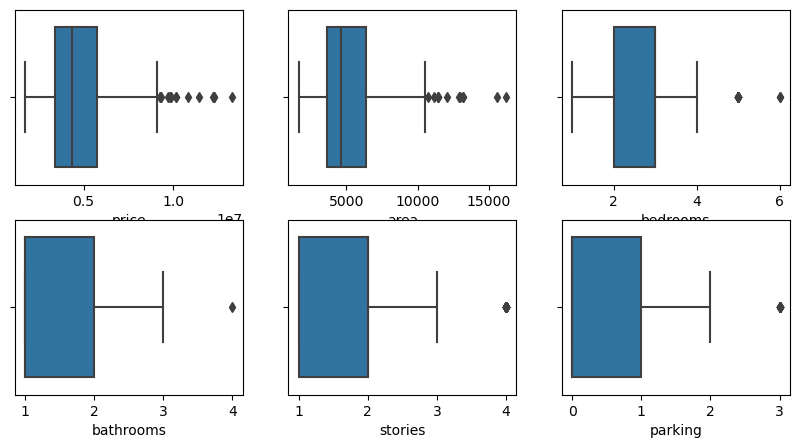

In [70]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

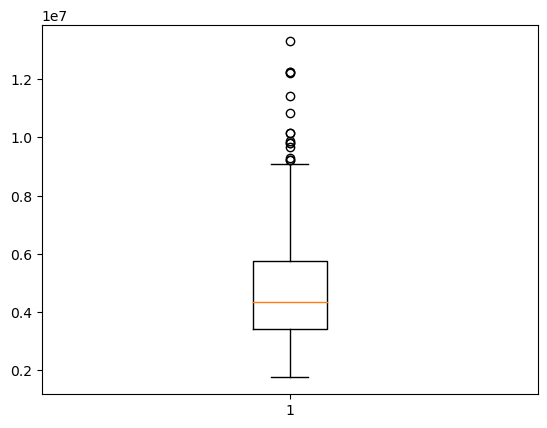

In [71]:
plt.boxplot(house.price)
Q1 = house.price.quantile(0.25)
Q3 = house.price.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.price >= Q1 - 1.5*IQR) & (house.price <= Q3 + 1.5*IQR)]

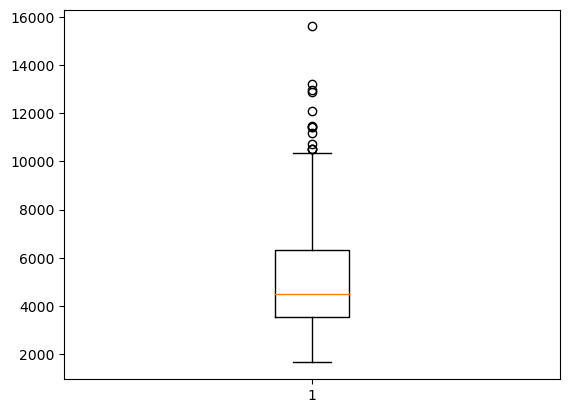

In [72]:
plt.boxplot(house.area)
Q1 = house.area.quantile(0.25)
Q3 = house.area.quantile(0.75)
IQR = Q3 - Q1
house = house[(house.area >= Q1 - 1.5*IQR) & (house.area <= Q3 + 1.5*IQR)]

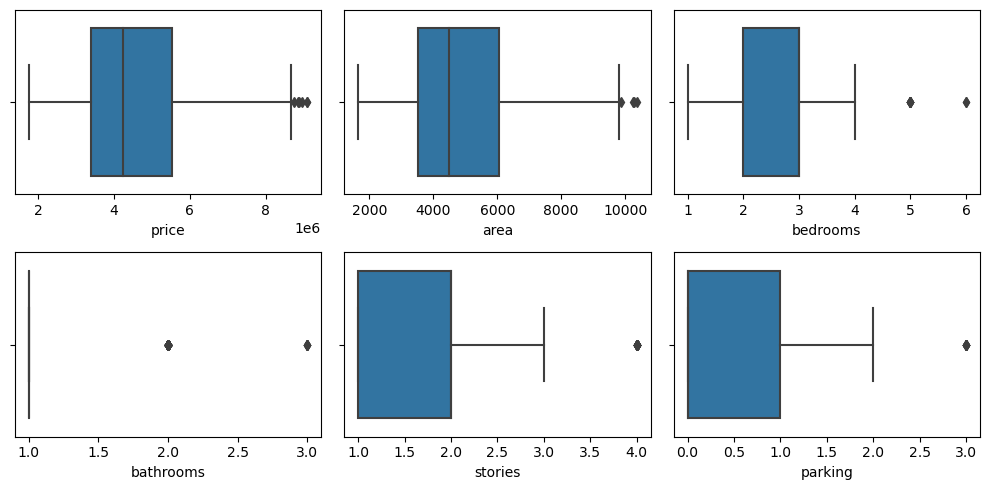

In [73]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(house['price'], ax = axs[0,0])
plt2 = sns.boxplot(house['area'], ax = axs[0,1])
plt3 = sns.boxplot(house['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(house['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(house['stories'], ax = axs[1,1])
plt3 = sns.boxplot(house['parking'], ax = axs[1,2])

plt.tight_layout()

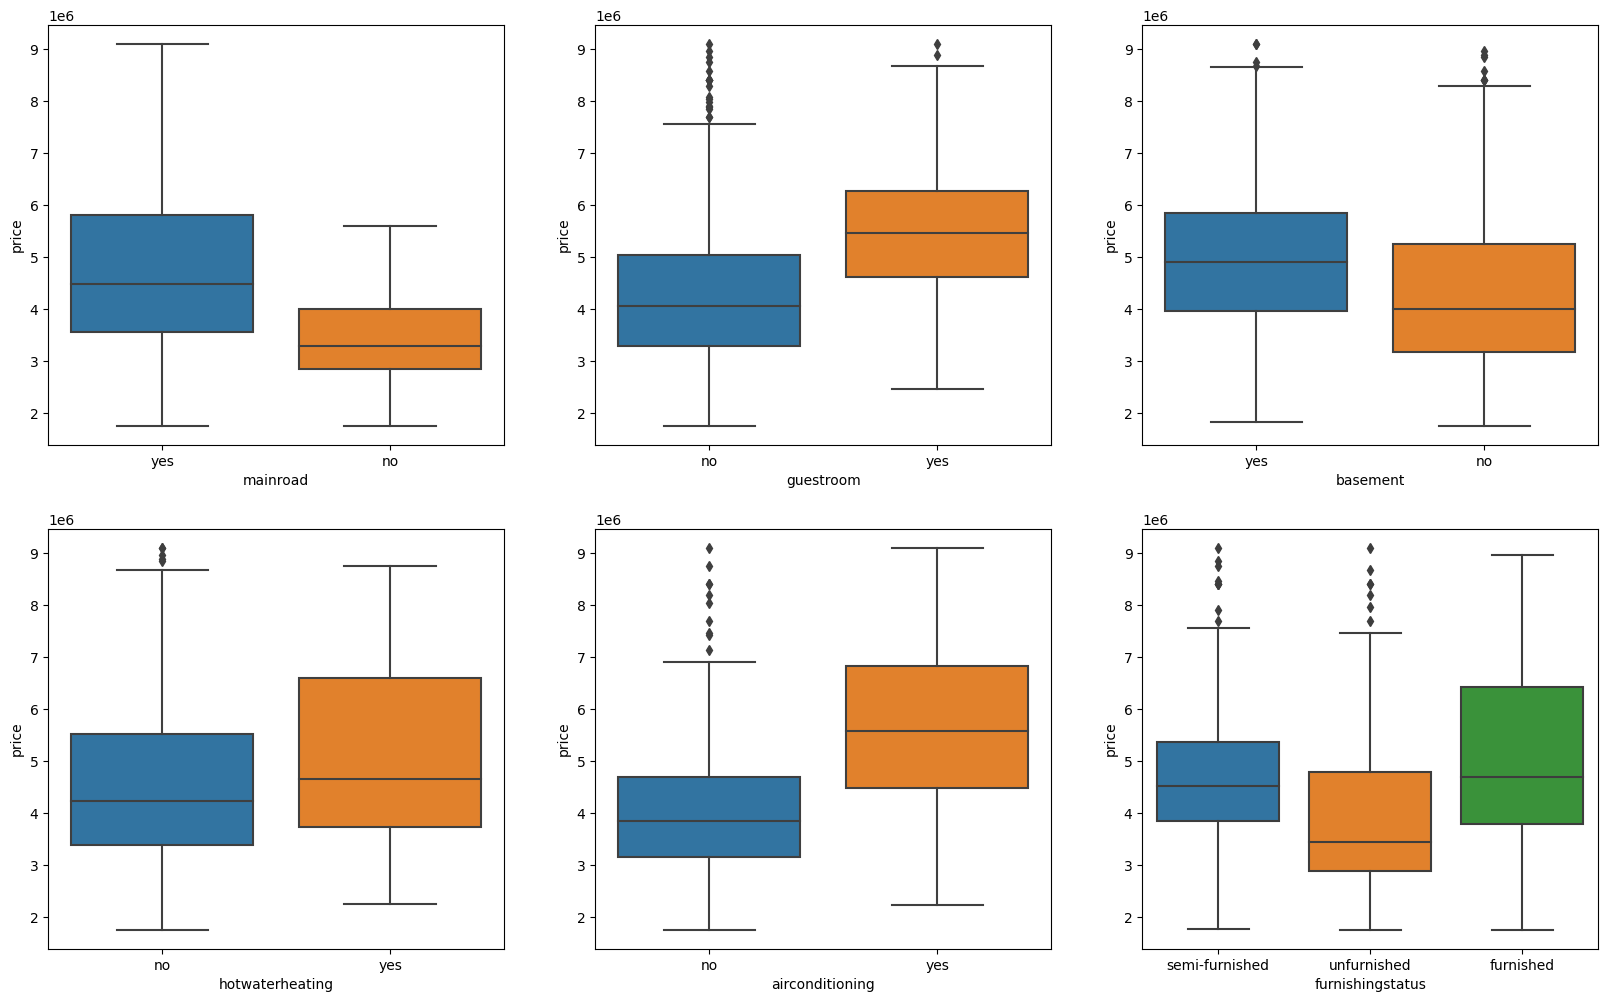

In [74]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = house)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = house)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = house)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = house)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = house)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = house)
plt.show()

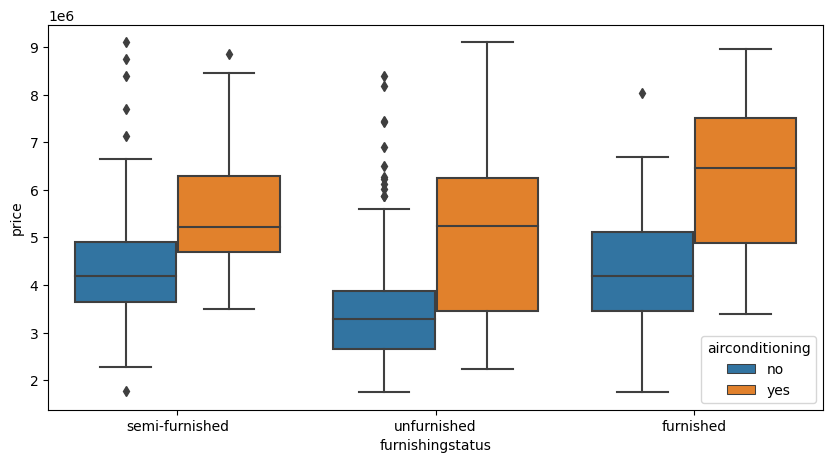

In [75]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = house)
plt.show()

# DATA CLEANING

In [76]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


def binary_map(x):
    return x.map({'yes': 1, "no": 0})


house[varlist] = house[varlist].apply(binary_map)

In [77]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [78]:
status = pd.get_dummies(house['furnishingstatus'])

In [79]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [80]:
status = pd.get_dummies(house['furnishingstatus'], drop_first = True)

In [81]:
house = pd.concat([house, status], axis = 1)

In [82]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [83]:
house.drop(['furnishingstatus'], axis = 1, inplace = True)

In [84]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


# SPLITTIND INTO TEST AND TRAIN

In [85]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [86]:
from sklearn.preprocessing import MinMaxScaler #MINMAX SCALING
scaler = MinMaxScaler()

In [87]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [88]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [89]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


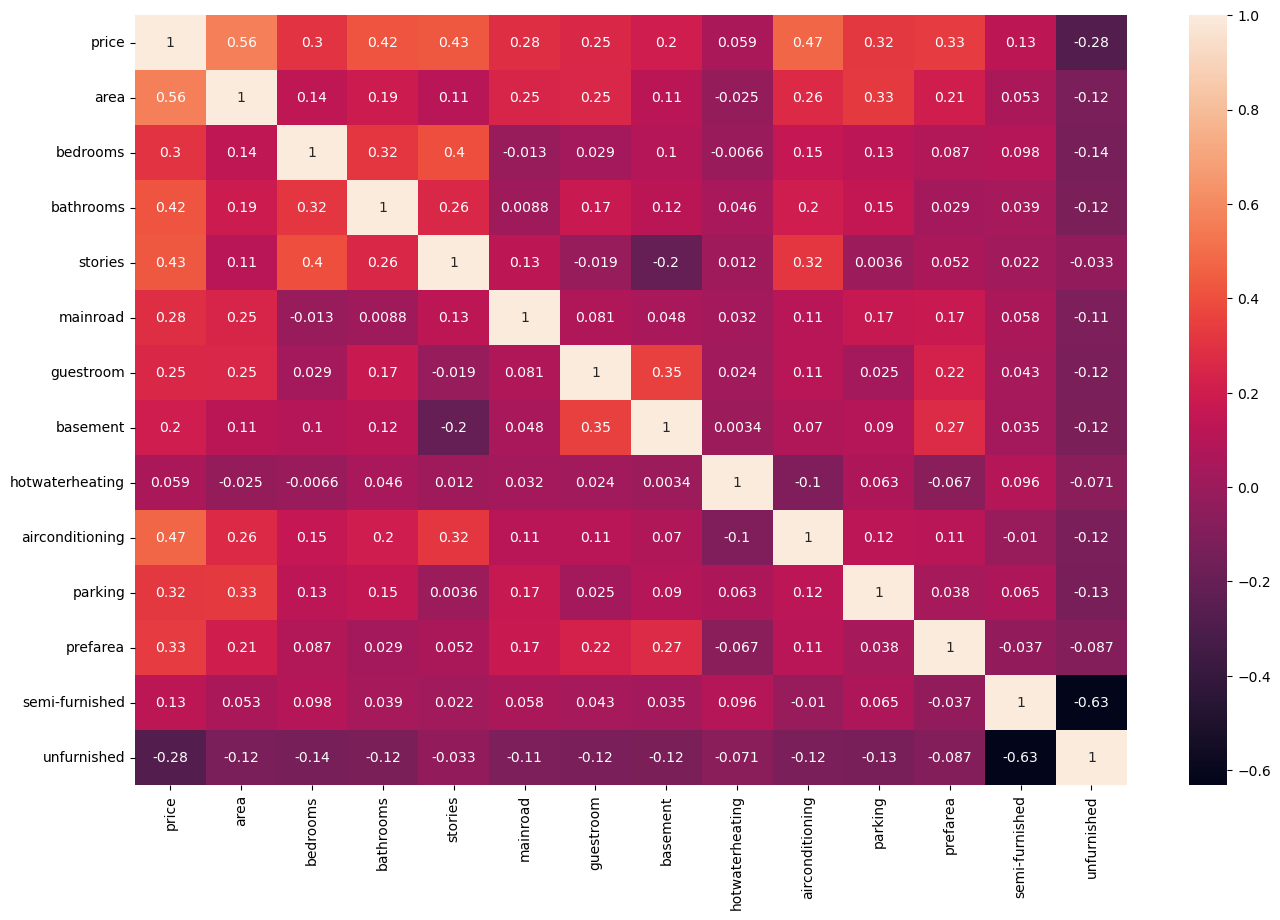

In [90]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [91]:
y_train = df_train.pop('price')
X_train = df_train

# MODEL SELECTION

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# IMPLEMENTING RFE

#### RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In [94]:
rfe = RFE(lm,n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [96]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [97]:
X_train.columns[~rfe.support_]


Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [98]:
X_train_rfe = X_train[col]

#### Linear models with independently and identically distributed errors, and for errors with heteroscedasticity or autocorrelation. This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.

# USING STATSMODELS IN RFE 

In [99]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe) #adding a constant to the train dataset

In [100]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [101]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.31e-69
Time:                        12:50:22   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

### the variance inflation factor (VIF), which measures the correlation and strength of correlation between the explanatory variables in a regression model.

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


In [104]:
y_train_price = lm.predict(X_train_rfe)
res=(y_train_price-y_train)

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Errors')

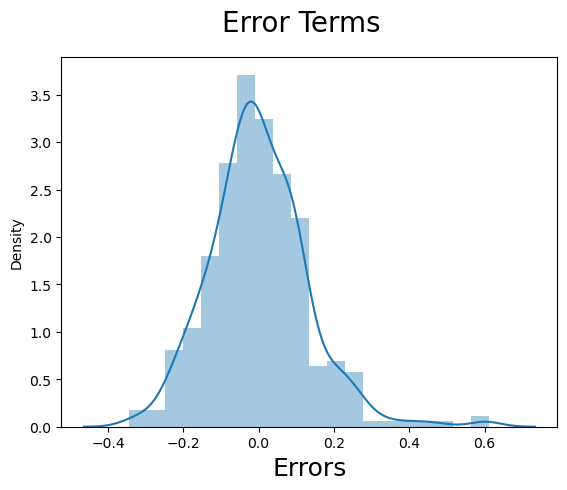

In [106]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

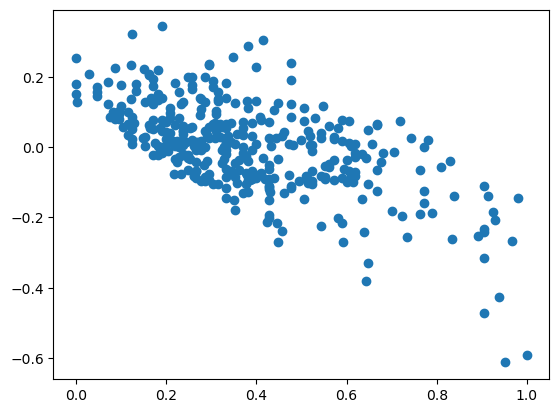

In [107]:
plt.scatter(y_train,res)
plt.show()

In [108]:
num = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [109]:
df_test[num] = scaler.fit_transform(df_test[num])

In [110]:
y_test = df_test.pop('price')
X_test = df_test

In [111]:
X_test = sm.add_constant(X_test)

In [112]:
X_test_rfe = X_test[X_train_rfe.columns]

In [113]:
y_pred = lm.predict(X_test_rfe)

In [114]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5791247774397742

Text(0, 0.5, 'y_pred')

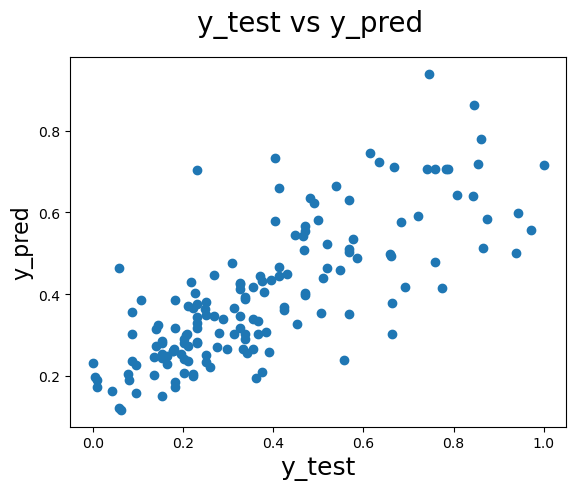

In [115]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [116]:
y_pred

244    0.432293
287    0.425883
166    0.634367
176    0.553494
282    0.290346
         ...   
314    0.303544
36     0.717456
298    0.346144
435    0.207101
421    0.236043
Length: 156, dtype: float64